In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


In [64]:
## Import and copy data
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/My Drive/customer_churn_dataset.csv')
df_copy = df.copy()
df_copy.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


CustomerID  Age  Gender  Tenure  Usage Frequency  Support Calls  \
0           1   22  Female      25               14              4   
1           2   41  Female      28               28              7   
2           3   47    Male      27               10              2   
3           4   35    Male       9               12              5   
4           5   53  Female      58               24              9   

   Payment Delay Subscription Type Contract Length  Total Spend  \
0             27             Basic         Monthly          598   
1             13          Standard         Monthly          584   
2             29           Premium          Annual          757   
3             17           Premium       Quarterly          232   
4              2          Standard          Annual          533   

   Last Interaction  Churn  
0                 9      1  
1                20      0  
2                21      0  
3                18      0  
4                18      0

In [65]:
df_copy.drop("CustomerID",axis = 1 ,inplace = True)

# We drop the "CustomerID" column :

## Because this information is not relevant for calculation and prediction for the model.
## this just like index and this is not needed to the model.


In [66]:
df_copy

Age  Gender  Tenure  Usage Frequency  Support Calls  Payment Delay  \
0       22  Female      25               14              4             27   
1       41  Female      28               28              7             13   
2       47    Male      27               10              2             29   
3       35    Male       9               12              5             17   
4       53  Female      58               24              9              2   
...    ...     ...     ...              ...            ...            ...   
64369   45  Female      33               12              6             21   
64370   37    Male       6                1              5             22   
64371   25    Male      39               14              8             30   
64372   50  Female      18               19              7             22   
64373   52  Female      45               15              9             25   

      Subscription Type Contract Length  Total Spend  Last Interaction  Churn  
0                 Basic         Monthly          598                 9      1  
1              Standard         Monthly          584                20      0  
2               Premium          Annual          757                21      0  
3               Premium       Quarterly          232                18      0  
4              Standard          Annual          533                18      0  
...                 ...             ...          ...               ...    ...  
64369             Basic       Quarterly          947                14      1  
64370          Standard          Annual          923                 9      1  
64371           Premium         Monthly          327                20      1  
64372          Standard         Monthly          540                13      1  
64373          Standard         Monthly          696                22      1  

[64374 rows x 11 columns]

In [36]:
df_copy.isnull().sum()

Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [6]:
duplicate_rows = df_copy[df_copy.duplicated(keep=False)]
duplicate_rows

Empty DataFrame
Columns: [Age, Gender, Tenure, Usage Frequency, Support Calls, Payment Delay, Subscription Type, Contract Length, Total Spend, Last Interaction, Churn]
Index: []

In [37]:
df_copy["Gender"].unique()

array(['Female', 'Male'], dtype=object)

In [67]:
df_copy = pd.get_dummies(df_copy, columns=['Gender'], drop_first=True)
df_copy = pd.get_dummies(df_copy, columns=['Subscription Type','Contract Length'], drop_first=False)


In [6]:
df_copy

Age  Tenure  Usage Frequency  Support Calls  Payment Delay  \
0       22      25               14              4             27   
1       41      28               28              7             13   
2       47      27               10              2             29   
3       35       9               12              5             17   
4       53      58               24              9              2   
...    ...     ...              ...            ...            ...   
64369   45      33               12              6             21   
64370   37       6                1              5             22   
64371   25      39               14              8             30   
64372   50      18               19              7             22   
64373   52      45               15              9             25   

       Total Spend  Last Interaction  Churn  Gender_Male  \
0              598                 9      1        False   
1              584                20      0        False   
2              757                21      0         True   
3              232                18      0         True   
4              533                18      0        False   
...            ...               ...    ...          ...   
64369          947                14      1        False   
64370          923                 9      1         True   
64371          327                20      1         True   
64372          540                13      1        False   
64373          696                22      1        False   

       Subscription Type_Basic  Subscription Type_Premium  \
0                         True                      False   
1                        False                      False   
2                        False                       True   
3                        False                       True   
4                        False                      False   
...                        ...                        ...   
64369                     True                      False   
64370                    False                      False   
64371                    False                       True   
64372                    False                      False   
64373                    False                      False   

       Subscription Type_Standard  Contract Length_Annual  \
0                           False                   False   
1                            True                   False   
2                           False                    True   
3                           False                   False   
4                            True                    True   
...                           ...                     ...   
64369                       False                   False   
64370                        True                    True   
64371                       False                   False   
64372                        True                   False   
64373                        True                   False   

       Contract Length_Monthly  Contract Length_Quarterly  
0                         True                      False  
1                         True                      False  
2                        False                      False  
3                        False                       True  
4                        False                      False  
...                        ...                        ...  
64369                    False                       True  
64370                    False                      False  
64371                     True                      False  
64372                     True                      False  
64373                     True                      False  

[64374 rows x 15 columns]

In [10]:
df_copy.corr()

Age    Tenure  Usage Frequency  \
Age                         1.000000 -0.007763        -0.038331   
Tenure                     -0.007763  1.000000         0.023485   
Usage Frequency            -0.038331  0.023485         1.000000   
Support Calls               0.005014  0.060065        -0.014072   
Payment Delay              -0.016132  0.055963         0.031132   
Total Spend                 0.006490  0.009474         0.001527   
Last Interaction           -0.000148  0.005770        -0.009192   
Churn                       0.063457  0.195327        -0.115098   
Gender_Male                 0.001800  0.029418        -0.006907   
Subscription Type_Basic    -0.001585 -0.002201         0.000381   
Subscription Type_Premium  -0.004582 -0.002881         0.000364   
Subscription Type_Standard  0.006161  0.005078        -0.000744   
Contract Length_Annual     -0.000740  0.001039        -0.013769   
Contract Length_Monthly     0.001311 -0.003306         0.008066   
Contract Length_Quarterly  -0.000585  0.002310         0.005677   

                            Support Calls  Payment Delay  Total Spend  \
Age                              0.005014      -0.016132     0.006490   
Tenure                           0.060065       0.055963     0.009474   
Usage Frequency                 -0.014072       0.031132     0.001527   
Support Calls                    1.000000       0.064298     0.021750   
Payment Delay                    0.064298       1.000000    -0.031119   
Total Spend                      0.021750      -0.031119     1.000000   
Last Interaction                 0.001666      -0.008076    -0.007692   
Churn                            0.304631       0.557386    -0.078867   
Gender_Male                      0.035418      -0.058578     0.029337   
Subscription Type_Basic          0.005258       0.003297    -0.000311   
Subscription Type_Premium       -0.005009      -0.003979     0.006925   
Subscription Type_Standard      -0.000250       0.000680    -0.006608   
Contract Length_Annual           0.010961      -0.016042    -0.018179   
Contract Length_Monthly         -0.016492       0.028522     0.024744   
Contract Length_Quarterly        0.005705      -0.012800    -0.006814   

                            Last Interaction     Churn  Gender_Male  \
Age                                -0.000148  0.063457     0.001800   
Tenure                              0.005770  0.195327     0.029418   
Usage Frequency                    -0.009192 -0.115098    -0.006907   
Support Calls                       0.001666  0.304631     0.035418   
Payment Delay                      -0.008076  0.557386    -0.058578   
Total Spend                        -0.007692 -0.078867     0.029337   
Last Interaction                    1.000000 -0.002818    -0.000472   
Churn                              -0.002818  1.000000    -0.164549   
Gender_Male                        -0.000472 -0.164549     1.000000   
Subscription Type_Basic             0.004521  0.012869    -0.005664   
Subscription Type_Premium          -0.005186 -0.012334     0.000281   
Subscription Type_Standard          0.000662 -0.000539     0.005380   
Contract Length_Annual             -0.003731 -0.016284     0.022167   
Contract Length_Monthly             0.000819  0.061464    -0.028741   
Contract Length_Quarterly           0.002925 -0.046000     0.006856   

                            Subscription Type_Basic  \
Age                                       -0.001585   
Tenure                                    -0.002201   
Usage Frequency                            0.000381   
Support Calls                              0.005258   
Payment Delay                              0.003297   
Total Spend                               -0.000311   
Last Interaction                           0.004521   
Churn                                      0.012869   
Gender_Male                               -0.005664   
Subscription Type_Basic                    1.000000   
Subscription Type_Premium                 -0.4992

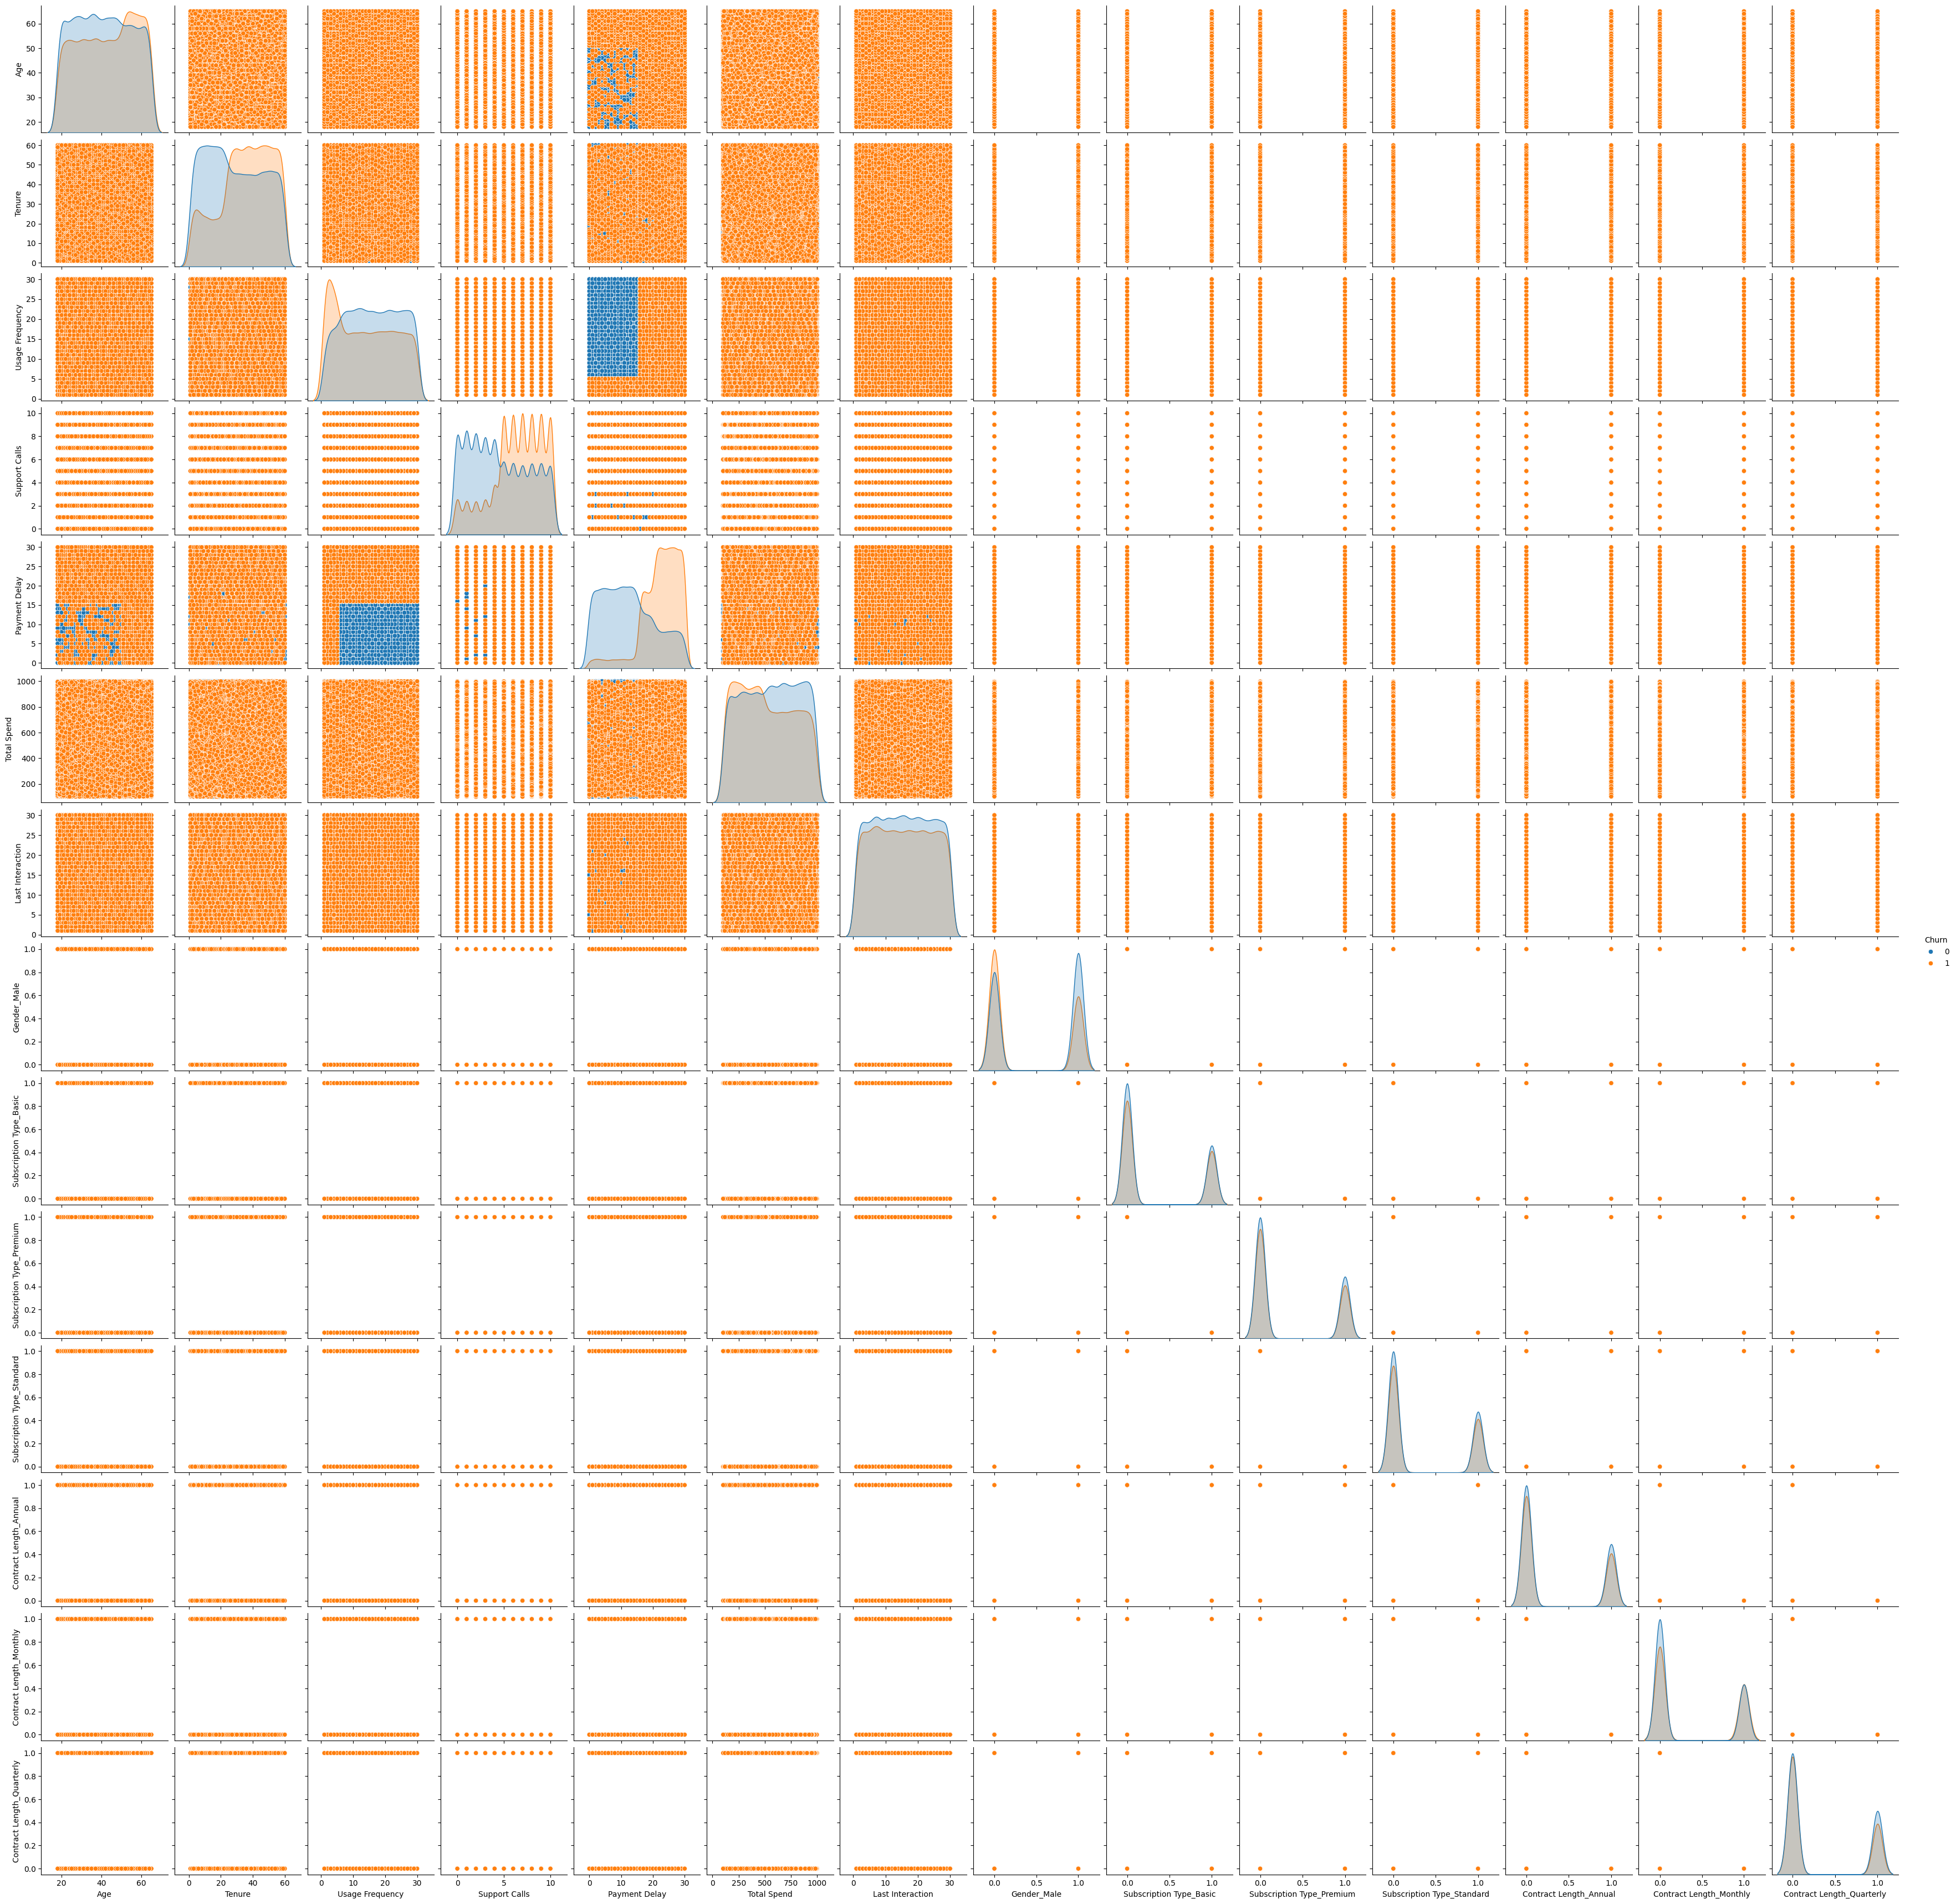

In [11]:
sns.pairplot(df_copy, hue='Churn')
plt.show()

##  As we can see from the dataset of the corr() function,
## There is Positive correlation between Payment Delay and The label - Churn:

### It makes sense that customers with payment delays are more likely to churn. This could be due to financial difficulties or dissatisfaction with the service.

## There is also Positive correlation between Support Calls and The label - Churn:
### it could indicates that customers who make more support calls are more likely to churn. This could be due to dissatisfaction with the service or product and because this they calling support a lot.

## There is  negative correlation Contract between Length_Monthly and The label - Churn:
### A strong negative correlation indicates that customers with monthly contracts are more likely to leave. The fact that the contracts are only monthly shows that the relationship with the customers was planned in advance not to stay for a long time.

# correlation between features.
## Subscription Standard Basic and Premium has negative correlation with each other.
### It makes sense because as it seems a customer can only belong to one subscription type at a time.  

## Contract Length Annual, Monthly and Quarterly has negative correlation with each other.
### It makes sense because as it seems a customer can only have one contract length at a time.

## Another thing you can see from the pairplot function, When we look at the columns Usage Frequency and Payment Delay is that the customers who called support often and and did not delay payment did not Churn.
## Customers who called not often for support Churn.
## and customers who called often and delayed payment Churn.

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [69]:
X = df_copy.drop("Churn", axis=1)
y = df_copy["Churn"]

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## preprae evaluate_model function

In [71]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix
global models_scores_results
models_scores_results = pd.DataFrame(columns=['Model', 'Accuracy', 'Recall', 'F1-Score'])

def evaluate_model_and_append(y_pred ,model_name):

  global models_scores_results
  accuracy = accuracy_score(y_test, y_pred)
  print(f'Accuracy: {accuracy}')

  recall = recall_score(y_test, y_pred)
  print(f'Recall: {recall}')

  f1 = f1_score(y_test, y_pred)
  print(f'F1-score: {f1}')

  confusion = confusion_matrix(y_test, y_pred)
  print("\nConfusion Matrix:\n", confusion)

  models_scores_results = pd.concat([models_scores_results,
                                  pd.DataFrame({'Model': [model_name],
                                                'Accuracy': [accuracy],
                                                'Recall': [recall],
                                                'F1-Score': [f1]})],
                                 ignore_index=True)


## preprae confusion_matrix function

In [72]:
def heat_map_confusion_matrix(y_pred):

    cm = confusion_matrix(y_test, y_pred)
    cmap = plt.cm.viridis

    sns.heatmap(cm, annot=True, fmt="d", cmap=cmap)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

## Logistic Regression Model
### find the optimal parameters by GridSrarchCv

In [18]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.001,0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']}

logistic_reg = LogisticRegression()

grid_search = GridSearchCV(logistic_reg, param_grid, cv=5)
grid_search.fit(scaled_X_train, y_train)

# Find the Best parameters
best_params = grid_search.best_params_


In [19]:
best_params

{'C': 0.001, 'penalty': 'l2', 'solver': 'saga'}

# Now we can train a logisitic model with the best param we found

In [73]:
logistic_model = LogisticRegression(C = 0.001, penalty= 'l2', solver = 'saga')
logistic_model.fit(scaled_X_train, y_train)

LogisticRegression(C=0.001, solver='saga')

In [21]:
logistic_model.coef_

array([[ 0.1903596 ,  0.45150358, -0.3666391 ,  0.74635318,  1.37583819,
        -0.18827843, -0.00885961, -0.41393919,  0.01653286, -0.01078452,
        -0.0057547 , -0.02429033,  0.09905548, -0.07640228]])

In [74]:
y_pred = logistic_model.predict(scaled_X_test)
y_pred

array([0, 0, 1, ..., 0, 1, 1])

In [23]:
y_pred_prob =  logistic_model.predict_proba(scaled_X_test)
y_pred_prob

array([[0.95851812, 0.04148188],
       [0.98358589, 0.01641411],
       [0.21091487, 0.78908513],
       ...,
       [0.71215469, 0.28784531],
       [0.17143313, 0.82856687],
       [0.13541058, 0.86458942]])

In [75]:
evaluate_model_and_append(y_pred,"Logistic Regression Model")

Accuracy: 0.8289753016103143
Recall: 0.8277590151432618
F1-score: 0.8214498080977349

Confusion Matrix:
 [[8412 1722]
 [1581 7598]]


<ipython-input-71-6cf6a50022ae>:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  models_scores_results = pd.concat([models_scores_results,


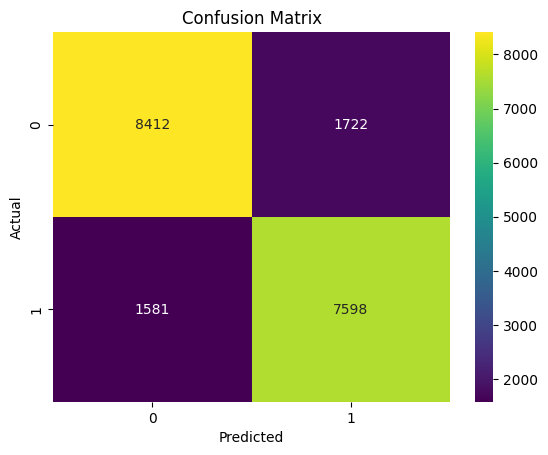

In [25]:
heat_map_confusion_matrix(y_pred)

# KNN Model

In [26]:
from sklearn.neighbors import KNeighborsClassifier
test_accuracy_scores = []


for k in range(1,10):

    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train, y_train)
    y_pred = knn_model.predict(scaled_X_test)



    test_accuracy_score = accuracy_score(y_test, y_pred)
    test_accuracy_scores.append(test_accuracy_score)


# Preform Elbow Method to Check Which K Value is the Optimal Value

In [27]:
test_accuracy_scores

[0.8807538963392534,
 0.8720033138300627,
 0.8979961683839901,
 0.9012582198519132,
 0.9069538652720965,
 0.9111479314451406,
 0.9104230311189354,
 0.9148242116708952,
 0.9110961528504117]

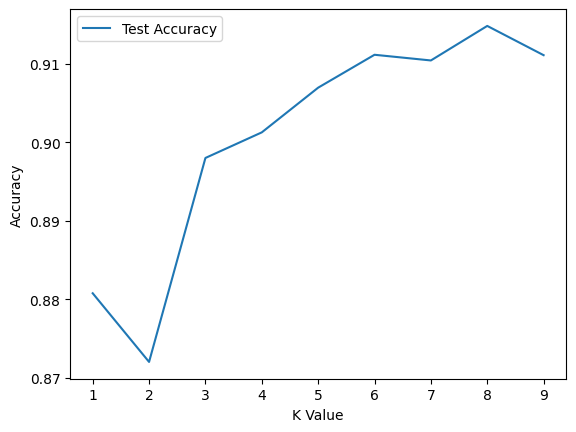

In [28]:
plt.plot(range(1,10), test_accuracy_scores[:10], label='Test Accuracy')

plt.ylabel('Accuracy')
plt.xlabel('K Value')
plt.legend()
plt.show()

# We Found that the optimal k value is 6

In [76]:
knn_model = KNeighborsClassifier(n_neighbors = 6)
knn_model.fit(scaled_X_train, y_train)
y_pred = knn_model.predict(scaled_X_test)
confusion_matrix(y_test, y_pred)



array([[9340,  794],
       [ 922, 8257]])

In [77]:
y_pred

array([0, 0, 1, ..., 0, 1, 1])

In [31]:
y_pred_prob =  knn_model.predict_proba(scaled_X_test)
y_pred_prob

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [0.33333333, 0.66666667],
       ...,
       [1.        , 0.        ],
       [0.16666667, 0.83333333],
       [0.16666667, 0.83333333]])

In [78]:
evaluate_model_and_append(y_pred,"KNN Model")

Accuracy: 0.9111479314451406
Recall: 0.8995533282492646
F1-score: 0.9058694459681842

Confusion Matrix:
 [[9340  794]
 [ 922 8257]]


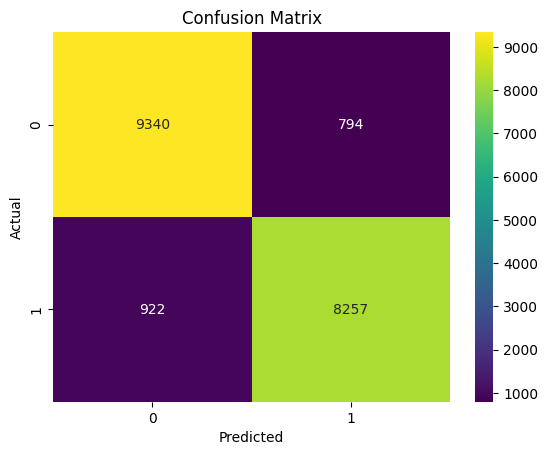

In [33]:
heat_map_confusion_matrix(y_pred)

# SVM Model

## Preform GridSearch to find the optimal parameters

## I tried to run the grid search on the Jupyter notebook - it probably didn't work because of the complexity of the tests on information of this size, so I trained in google colab.
## Even so, it also took a lot of time (more than half an hour), so I didn't let grid search check many variables. (like more c values, and kernel = poly and additional cv)

In [34]:
from sklearn.svm import SVC

svc = SVC()

param_grid = {
    'C': [0.001, 0.01, 0.1, 1],
    'kernel': ['rbf', 'linear']
}

grid_search = GridSearchCV(svc, param_grid, scoring='accuracy', return_train_score=True)
grid_search.fit(scaled_X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1],
                         'kernel': ['rbf', 'linear']},
             return_train_score=True, scoring='accuracy')

In [35]:
grid_search.best_params_

{'C': 1, 'kernel': 'rbf'}

## we found the best params are 'C' = 1, 'kernel' = 'rbf'

# Train the SVM Model with The best params

In [79]:
SVC_model = SVC(kernel='rbf', C=1, probability=True)
SVC_model.fit(scaled_X_train, y_train)

y_pred = SVC_model.predict(scaled_X_test)

evaluate_model_and_append(y_pred,"SVM Model")

Accuracy: 0.9372443431885259
Recall: 0.9492319424773941
F1-score: 0.9349715634724756

Confusion Matrix:
 [[9388  746]
 [ 466 8713]]


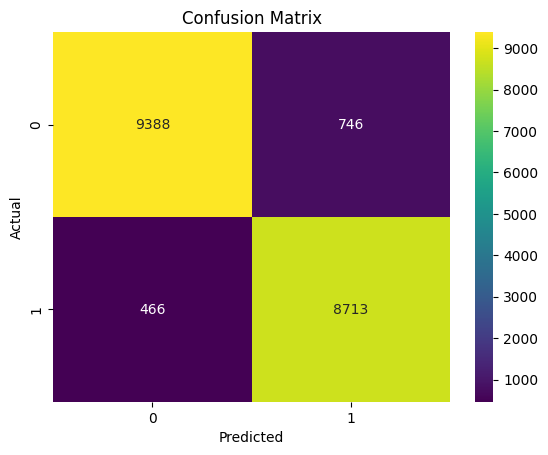

In [41]:
heat_map_confusion_matrix(y_pred)

In [53]:
y_pred

array([0, 0, 1, ..., 0, 1, 1])

#  This model is primarily designed for classification and doesn't naturally provide probability estimates - but i have made a change in the param probability = True - to use this method. so the probability can't be shown like always

In [43]:
y_pred_prob =  SVC_model.predict_proba(scaled_X_test)
y_pred_prob

array([[9.99995434e-01, 4.56596593e-06],
       [9.99964065e-01, 3.59345607e-05],
       [3.83915877e-01, 6.16084123e-01],
       ...,
       [9.99935836e-01, 6.41644959e-05],
       [1.17245128e-01, 8.82754872e-01],
       [1.45529531e-01, 8.54470469e-01]])

# Random Forest Model

In [27]:
scaled_X_test.shape

(19313, 14)

## Preform GridSearch to find the optimal parameters

In [55]:
from sklearn.ensemble import RandomForestClassifier

n_estimators = [64, 100, 128, 200]
max_features = [4, 8, 10, 14]
boostrap = [True, False]
oob_score = [True, False]

max_depth = [4, 10, 20, 30]
max_leaf_nodes = [15, 30, 50, 70]

param_grid = {
    'max_depth': max_depth,
    'max_leaf_nodes': max_leaf_nodes,
    'n_estimators': n_estimators,
    'max_features': max_features,
    'bootstrap': boostrap,
    'oob_score': oob_score
}


random_forest_model = RandomForestClassifier()
grid_search = GridSearchCV(random_forest_model, param_grid)


grid_search.fit(scaled_X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
1280 fits failed out of a total of 5120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1280 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 417, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True"

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [4, 10, 20, 30],
                         'max_features': [4, 8, 10, 14],
                         'max_leaf_nodes': [15, 30, 50, 70],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [56]:
grid_search.best_params_

{'bootstrap': False,
 'max_depth': 20,
 'max_features': 8,
 'max_leaf_nodes': 70,
 'n_estimators': 200,
 'oob_score': False}

## we found the best param for the tree

## we found the best param for the forest and tree are
## 'bootstrap': False, 'max_depth': 20, 'max_features': 8,'max_leaf_nodes': 70, 'n_estimators': 200, 'oob_score': False

# Train the Random Forest Model with The best param

In [81]:
random_forest_model = RandomForestClassifier(max_depth = 20, max_leaf_nodes=70, n_estimators=200, max_features=8, bootstrap=False, oob_score=False)
random_forest_model.fit(scaled_X_train, y_train)

y_pred = random_forest_model.predict(scaled_X_test)

evaluate_model_and_append(y_pred,"Random Forest Model")

Accuracy: 0.9991715424843369
Recall: 0.9984747793877329
F1-score: 0.999127875286166

Confusion Matrix:
 [[10132     2]
 [   14  9165]]


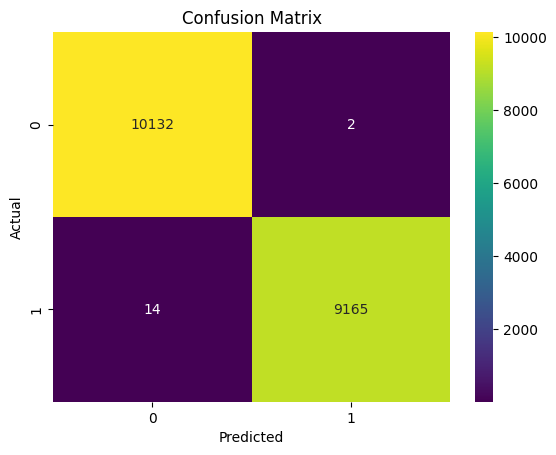

In [82]:
heat_map_confusion_matrix(y_pred)

In [83]:
y_pred

array([0, 0, 1, ..., 0, 1, 1])

In [84]:
y_pred_prob =  random_forest_model.predict_proba(scaled_X_test)
y_pred_prob

array([[0.99240928, 0.00759072],
       [0.99741575, 0.00258425],
       [0.02260829, 0.97739171],
       ...,
       [0.97172414, 0.02827586],
       [0.00677457, 0.99322543],
       [0.01744051, 0.98255949]])

In [85]:
models_scores_results

Model  Accuracy    Recall  F1-Score
0  Logistic Regression Model  0.828975  0.827759  0.821450
1                  KNN Model  0.911148  0.899553  0.905869
2                  SVM Model  0.937244  0.949232  0.934972
3        Random Forest Model  0.999172  0.998475  0.999128

#Train And Export the best model

In [86]:
scaled_X = scaler.fit_transform(X)
final_model =  RandomForestClassifier(max_depth = 20, max_leaf_nodes=70, n_estimators=200, max_features=8, bootstrap=False, oob_score=False)
final_model.fit(scaled_X, y)

RandomForestClassifier(bootstrap=False, max_depth=20, max_features=8,
                       max_leaf_nodes=70, n_estimators=200)

In [87]:
def order_data_by_dummy_columns(old_x_cloumn , new_data):
  new_data_with_dummy_columns = pd.get_dummies(new_data, drop_first=True)

  # Find all the get_dummies columns that exist in our training DF but not in our new DF
  missing_dummy_columns = old_x_cloumn.columns.difference(new_data_with_dummy_columns.columns)

  # Add missing columns to the new DF with False values
  for col in missing_dummy_columns:
      new_data_with_dummy_columns[col] = False

  # Reorder new DF columns to match the order of our training DF columns
  new_data_with_dummy_columns = new_data_with_dummy_columns[old_x_cloumn.columns]

In [88]:
from joblib import dump,load
dump(final_model, "final_churn_model.joblib")
dump(scaler, "churn_scaler.joblib")

['churn_scaler.joblib']

In [89]:
loaded_model = load("final_churn_model.joblib")
loaded_scaler = load("churn_scaler.joblib")